In [1]:
# https://github.com/jukyellow/algoTrade/blob/master/ch07/7.2.2%20keras%20cheat%20sheet.ipynb

In [2]:
import warnings , os
warnings.filterwarnings(action='ignore')

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

data = np.random.random((1000,100))
labels = np.random.randint(2,size=(1000,1))

model = Sequential()
model.add(Dense(32, activation = 'relu',input_dim=100))
model.add(Dense(1,activation= 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                3232      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


In [4]:
print(data.shape)
print(np.array_str(data, precision=4, suppress_small=True))
print()
print(np.array_str(labels[0:10], precision=2, suppress_small=True))

(1000, 100)
[[0.97   0.3844 0.6005 ... 0.5807 0.2062 0.2083]
 [0.0196 0.0637 0.1844 ... 0.7373 0.8642 0.0878]
 [0.4519 0.1079 0.3398 ... 0.5247 0.0836 0.8817]
 ...
 [0.3611 0.1606 0.8536 ... 0.8269 0.7207 0.6145]
 [0.0241 0.5941 0.9384 ... 0.8459 0.4654 0.8645]
 [0.7402 0.581  0.2453 ... 0.6726 0.9236 0.6351]]

[[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]]


In [5]:
model.compile(optimizer ='rmsprop',loss ='binary_crossentropy',metrics=['accuracy'])
history = model.fit(data,labels,epochs=10,batch_size=32)
predictions = model.predict(data)
print(predictions[0:10])

Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 0.7063 - accuracy: 0.5060
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.5048
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5009
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5640
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.5491
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.5602
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5491
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5786
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5760
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.6161
[[0.595548  ]
 [0.6

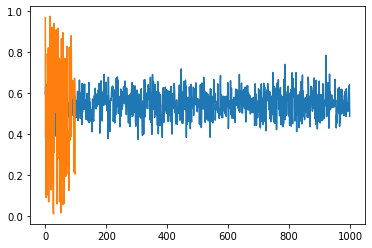

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(predictions)
plt.plot(data[0])

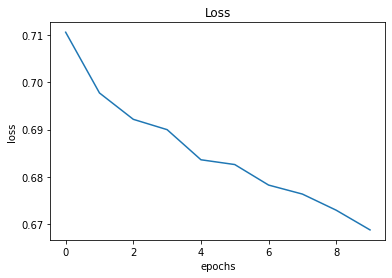

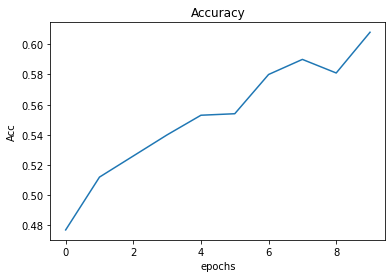

In [7]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Acc')
plt.show()

In [8]:
# 케라스 내장 Data를 불러와서 학습, 테스트 데이터로 나눠보자.

from keras.datasets import boston_housing, mnist, cifar10, imdb
num_classes = 10
(x_train,y_train),(x_test,y_test) = mnist.load_data()
(x_train2,y_train2),(x_test2,y_test2) = boston_housing.load_data()
(x_train3,y_train3),(x_test3,y_test3) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [9]:
from keras.utils import to_categorical
Y_train = to_categorical(y_train, num_classes = 10)
Y_test = to_categorical(y_test, num_classes = 10)

In [10]:
print(y_train.shape)
print(y_train[0])

print(Y_train.shape)
print(Y_train[0])

(60000,)
5
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
from sklearn.model_selection import train_test_split
# Mnist 예제 데이터를 학습과 테스트 셋으로 나눠보자.

X_train5, X_test5, y_train5, y_test5 = train_test_split(x_train,y_train, test_size=0.33, random_state=42)

In [12]:
print(x_train.shape)
print(X_train5.shape)
print(X_test5.shape)
print(y_train.shape)
print(y_train5.shape)
print(y_test5.shape)

(60000, 28, 28)
(40200, 28, 28)
(19800, 28, 28)
(60000,)
(40200,)
(19800,)


In [13]:
# Standardization / Normalization
# sklearn 내장함수를 이용해 피처데이터간 Scale을 조절할 수 있다.
# 아래 예제는 보스턴 집값 피처데이터에 대해 스케일을 조절하는 것이다.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train2)
standardized_X = scaler.transform(x_train2)
standardized_X_test = scaler.transform(x_test2)

In [14]:
# Model Architecture
# 아래 예시와 같이 여러방식으로 모델을 정의할 수 있다. 각각의 방법을 살펴보고 Convolutional Neural Network(CNN) 모델도 한번 살펴보자.
#  Sequential Model
#  Multi-Layer-Perceptron(MLP)
#  Binary Classification
#  Multi-Class Classification
#  Regression

#Sequential Model
from keras.models import Sequential
model = Sequential()
model2 = Sequential()
model3 = Sequential()

#Binary Classification
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

#Multi-Class Classification
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

model.add(Dense(512, activation = 'relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

#Regression
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation = 'relu',input_dim=x_train2.shape[1]))
model.add(Dense(1))

(28, 28)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


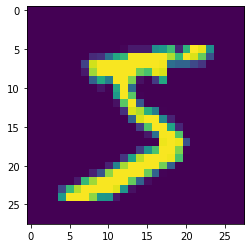

In [15]:
# MINIST를 이용해서 Convolutional Neural Network(CNN)을 살펴보자.

from keras.datasets import mnist
from keras.utils import to_categorical

(x_train,y_train),(x_test,y_test) = mnist.load_data()
num_classes = 10

Y_train = to_categorical(y_train, num_classes = 10)
Y_test = to_categorical(y_test, num_classes = 10)

print(x_train.shape[1:])
print(Y_train[0])

plt.figure()
plt.imshow(x_train[0])
# plt.colorbar()
plt.grid(False)
plt.show()

(10000, 28, 28)
(10000, 28, 28, 1)


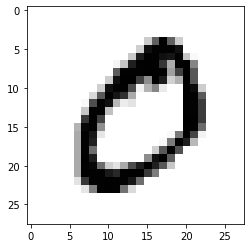

In [16]:
print(x_test.shape)
# 색상 채널에 값을 줘서 흑백으로 데이터를 변환해보자.
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
print(x_test.shape)

plt.figure()
plt.imshow(x_train[1].reshape(28,28),cmap=plt.cm.binary)
# plt.colorbar()
plt.grid(False)
plt.show()

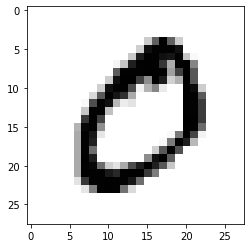

In [17]:
# 신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정한다.
# 이렇게 하려면 255로 나누면 된다.
# 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요하다.

tt = x_train[1].reshape(28,28)/ 255.0

plt.figure()
plt.imshow(tt,cmap=plt.cm.binary)
# plt.colorbar()
plt.grid(False)
plt.show()


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
x_train, x_test = x_train / 255.0, x_test / 255.0
num_classes = 10

Y_train = to_categorical(y_train, num_classes = 10)
Y_test = to_categorical(y_test, num_classes = 10)

In [19]:
model2 = Sequential()
model2.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(Conv2D(32,(3,3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64,(3,3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64,(3,3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)       

In [20]:
model2.compile(optimizer ='adam',loss ='categorical_crossentropy',metrics=['accuracy'])
history = model2.fit(x_train,Y_train,epochs=10,batch_size=32)
predictions = model2.predict(x_test)

# 5. 학습과정 살펴보기
print('## training loss and acc ##')
print(history.history['loss'])
print(history.history['accuracy'])

# 6. 모델 평가하기
loss_and_metrics = model2.evaluate(x_test, Y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.3291 - accuracy: 0.8936
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0603 - accuracy: 0.9819
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0431 - accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0353 - accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0327 - accuracy: 0.9896
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0291 - accuracy: 0.9913
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0277 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0228 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0222 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.020

In [21]:
# Recurrent Neural Network(RNN) 모델은 아래와 같이 정의할 수 있다.

from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense

model3 = Sequential()
model3.add(Embedding(20000,128))
model3.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model3.add(Dense(1,activation='sigmoid'))

model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [27]:
from keras.layers import SimpleRNN
import tensorflow as tf

# 기본 RNN 모델을 구현하기 위한 함수 (참고)
def stacked_vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (49,1), return_sequences = True))   # return_sequences parameter has to be set True to stack
    model.add(SimpleRNN(50, return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.001)
    adam = tf.keras.optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

model = stacked_vanilla_rnn()
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 49, 50)            2600      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dense_15 (Dense)             (None, 46)                2346      
_________________________________________________________________
activation_8 (Activation)    (None, 46)                0         
Total params: 9,996
Trainable params: 9,996
Non-trainable params: 0
_________________________________________________________________
